In [8]:
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append('/work/attalos/karllab41-attalos/')
import attalos.imgtxt_algorithms.linearregression.LinearRegression as linreg
# from attalos.evaluation.evaluation import Eval
from oct2py import octave
octave.addpath('../evaluation/')

reload(linreg)
%matplotlib inline

### Load the data in

In [2]:
data = np.load('linearregression/data/iaprtc_alexfc7.npz')
D = open('linearregression/data/iaprtc_dictionary.txt').read().splitlines()
train_ims = [ im.split('/')[-1] for im in open('linearregression/data/iaprtc_trainlist.txt').read().splitlines() ]
xTr = data['xTr'].T
yTr = data['yTr'].T
xTe = data['xTe'].T
yTe = data['yTe'].T

test_ims_full = [ im for im in open('linearregression/data/iaprtc_testlist.txt').read().splitlines() ]
train_ims_full = [ im for im in open('linearregression/data/iaprtc_trainlist.txt').read().splitlines() ]

### Train and test

In [17]:
mp_solution = linreg.LinearRegression(normX = True)
mp_solution.train(xTr, yTr)
yHat = mp_solution.predict(xTe)

Building W matrix = Y \ X = Y^T X (X X^T)^-1


### Evaluate the regression

In [16]:
[precision, recall, f1score] = octave.evaluate(yTe.T, yHat.T, 5)
print precision
print recall
print f1score

0.390792064489
0.213105627141
0.275808267324


### Visualize

Looking at the 146th image: linearregression/images/03/3235.jpg
Predicted: sky, building, tree, palm, street, boat, car, cloud, port, city, view, sea, man, hill, sign
Truth:     city, view


<Container object of 3 artists>

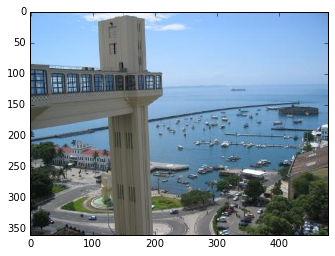

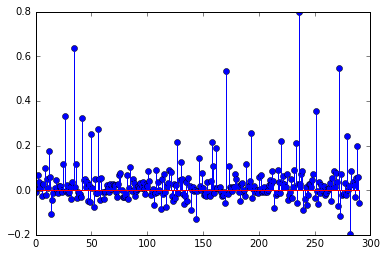

In [7]:
# Randomly select an image
i=np.random.randint(0, yTe.shape[1])

# Run example
imname='linearregression/images/'+test_ims_full[i]+'.jpg';
print "Looking at the "+str(i)+"th image: "+imname
im=plt.imread(imname)

# Prediction
ypwords = [D[j] for j in yHat[i].argsort()[::-1] [ 0:(yHat[i]>0.2).sum() ] ]
# Truth
ytwords = [D[j] for j in np.where(yTe[i] > 0.5)[0] ]

plt.imshow(im)
print 'Predicted: '+ ', '.join(ypwords)
print 'Truth:     '+ ', '.join(ytwords)

plt.figure()
plt.stem( yHat[i] )